<h1>Hello World!</h1>

<h1> Volume 01 Computer Vision Basics </h1>

Start to handle miniprojects about Computer Vision Technology in this notebook in order to keep myself studying the field.

Projects on this Notebook:

- RGB Channels and Histogram
- Crop, Rotate and Translate
- Thresholding 
- Scaling and Brightness 
- Morphological Operations 
- Smoothing Images 
- Masks 
- Edge Detection 
- Filter Vignette 
- Face and Eye Detection with Haar's 
- Feature Detection and Matching 

I might start new projects in the future but might use other notebooks for that.

<h3>Update: Decided on finish this notebook and start another to avoid make this one lengthy. 

<h1>Classic Image Processing Algorithms</h1>


<h3>RGB Channels and Histogram

(1080, 1920, 3)
(1080, 1920, 3)


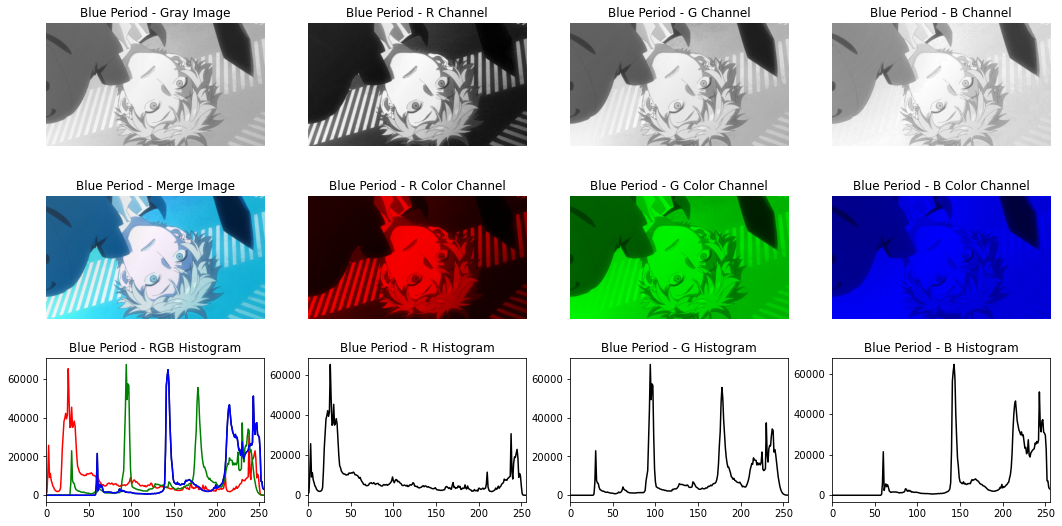

In [22]:
##### Images, Colors and Histograms #####

#Importing Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Create auxiliar variables to print
variables = [] 
titles = []

# Read Image
img = cv.imread('images/blue-period.jpg', cv.IMREAD_COLOR)
# Note: OpenCV read images as BGR instead of RGB so we need to convert.

#Convert to Gray Scale
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
variables.append(gray_img)
titles.append('Gray Image')

#Get each BGR part of Image
b_gimg, g_gimg, r_gimg = cv.split(img)
variables.append(r_gimg)
titles.append('R Channel')
variables.append(g_gimg)
titles.append('G Channel')
variables.append(b_gimg)
titles.append('B Channel')

#Other Method to split channels
#b_img = img[:,:, 0]
#g_img = img[:,:, 1]
#r_img = img[:,:, 2]

# Converting Image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Merge Image again
merge_img = cv.merge((r_gimg, g_gimg, b_gimg))
variables.append(merge_img)
titles.append('Merge Image')

#Shows Image Shape
print (img.shape)

# Copy the image
r_img = img.copy()
g_img = img.copy()
b_img = img.copy()

# Another way to get a variable with same shape of the image
copyimg = np.zeros(shape=img.shape, dtype=np.uint8)
print (copyimg.shape)

# Set green and blue channels to 0
r_img[:,:,1] = 0
r_img[:,:,2] = 0
variables.append(r_img)
titles.append('R Color Channel')

# Set red and blue channels to 0
g_img[:,:,0] = 0
g_img[:,:,2] = 0
variables.append(g_img)
titles.append('G Color Channel')

# Set green and red channels to 0
b_img[:,:,0] = 0
b_img[:,:,1] = 0
variables.append(b_img)
titles.append('B Color Channel')

# get histograms of image
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    img_hist = cv.calcHist([img], [i], None, [256], [0, 256])
variables.append(img_hist)
titles.append('RGB Histogram')

r_hist = cv.calcHist([r_gimg],[0], None, [256], [0,256])
variables.append(r_hist)
titles.append('R Histogram')

g_hist = cv.calcHist([g_gimg],[0], None, [256], [0,256])
variables.append(g_hist)
titles.append('G Histogram')

b_hist = cv.calcHist([b_gimg],[0], None, [256], [0,256])
variables.append(b_hist)
titles.append('B Histogram')

# Plot Results
for i in range(len(variables)):
    if i < 8:
        plt.subplot(3, 4, i+1)
        plt.imshow(variables[i], cmap="gray", vmin=0, vmax=255)
        plt.axis('off')
        plt.title('Blue Period - ' + titles[i])
    else:
        plt.subplot(3, 4, i+1)
        plt.plot(variables[i], color = 'black')
        plt.xlim([0, 256])
        plt.title('Blue Period - ' + titles[i])
        if i == 8:
            for j, col in enumerate(color):
                img_hist = cv.calcHist([img], [j], None, [256], [0, 256])
                plt.plot(img_hist, color = col)
            
plt.rcParams["figure.figsize"] = (18, 9)
plt.show()


<h3> Crop, Rotate and Translate

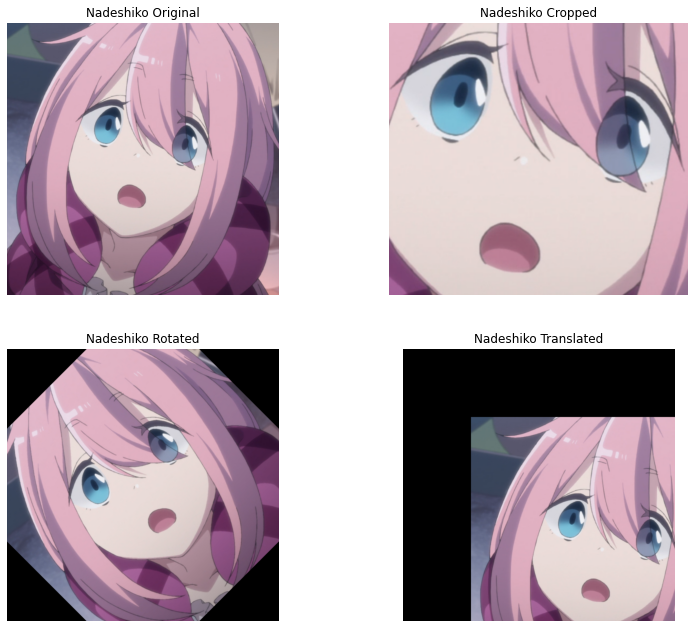

In [2]:
### Crop, Rotate and Translate ###

# Importing Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Load Image and convert to RGB
img = cv.imread('images/nadeshiko.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Original')

### CROP ###
cropImg = img[320:920, 320:980]
variables.append(cropImg)
titles.append('Cropped')

### ROTATE ###

#Find the center of image
height, width = img.shape[:2]
shape = (width, height)
center = (width/2, height/2)


rotateMatrix = cv.getRotationMatrix2D(center, 45, 1)
rotateImg = cv.warpAffine(img, rotateMatrix, shape)
variables.append(rotateImg)
titles.append('Rotated')


### TRANSLATE ###

tx, ty = width/4, height/4
translationMatrix = np.array([
    [1, 0, tx],    
    [0, 1, ty]], 
    dtype=np.float32)

translImg = cv.warpAffine(img, translationMatrix, shape)
variables.append(translImg)
titles.append('Translated')

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    plt.imshow(variables[i])
    plt.axis('off')
    plt.title('Nadeshiko ' + titles[i])
plt.rcParams["figure.figsize"] = (13, 11)
plt.show()

<h3>Thresholding

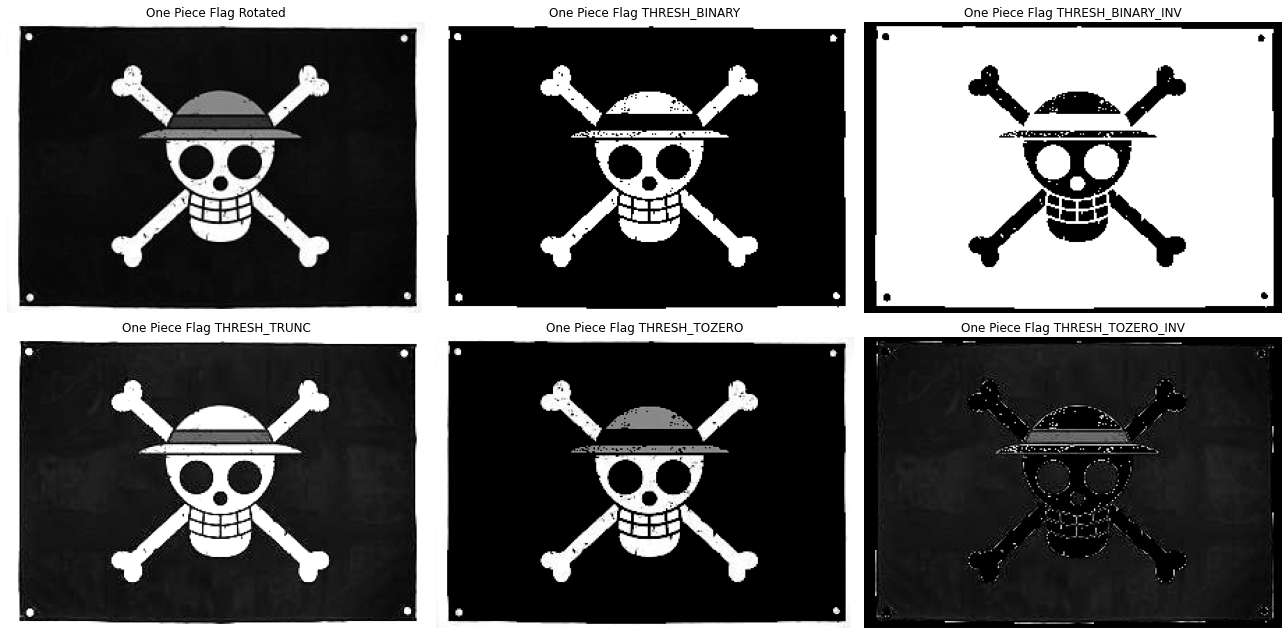

In [46]:
# Importing Modules
import cv2 as cv
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Load Image and convert to RGB
img = cv.imread('images/LuffyFlag.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
variables.append(gimg)
titles.append('Rotated')

# Binary Thresholding
ret, thb_img = cv.threshold(gimg, 127, 255, cv.THRESH_BINARY)
variables.append(thb_img)
titles.append('THRESH_BINARY')

# Inverse Binary Thresholding
ret, thbinv_img = cv.threshold(gimg, 127, 255, cv.THRESH_BINARY_INV)
variables.append(thbinv_img)
titles.append('THRESH_BINARY_INV')

# Truncate Thresholding
ret, thtr_img = cv.threshold(gimg, 127, 255, cv.THRESH_TRUNC)
variables.append(thtr_img)
titles.append('THRESH_TRUNC')

# Tresh to Zero Thresholding
ret, thzero_img = cv.threshold(gimg, 127, 255, cv.THRESH_TOZERO)
variables.append(thzero_img)
titles.append('THRESH_TOZERO')

# Inverse Tresh to Zero Thresholding
ret, thzeroinv_img = cv.threshold(gimg, 127, 255, cv.THRESH_TOZERO_INV)
variables.append(thzeroinv_img)
titles.append('THRESH_TOZERO_INV')

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 3, i+1)
    plt.imshow(variables[i], cmap="gray")
    plt.axis('off')
    plt.title('One Piece Flag ' + titles[i])
plt.rcParams["figure.figsize"] = (18, 9)
plt.show()


<h3>Scaling and Brightness

Image Shape:  (1343, 1918, 3)
Image Shape Resized:  (553, 367, 3)
Image DownScaled Shape:  (335, 479, 3)
Image UpScaled Shape:  (2014, 2877, 3)


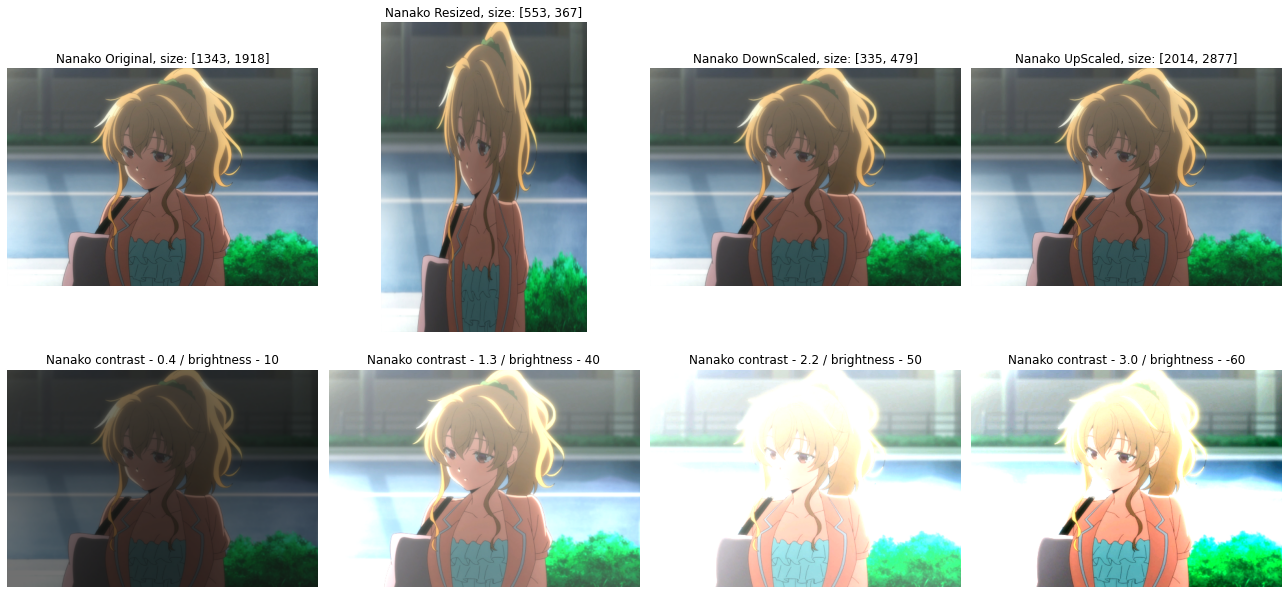

In [48]:
### Resize, Scaling, Brightness and Contrast ###

# Importing Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Load Image and convert to RGB
img = cv.imread('images/n@n@.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Original, size: [1343, 1918]')

### RESIZE ###

# Original Image Shape
print("Image Shape: ", img.shape)

# Defining Custom Size
height = 553
width = 367
dimension = (width, height)

# OpenCV Resize function
resized = cv.resize(img, dimension, interpolation = cv.INTER_AREA)
variables.append(resized)
titles.append('Resized, size: [553, 367]')

# Image Shape
print("Image Shape Resized: ", resized.shape)

### SCALING ###

# Obtained Image Size Features
height, width, ch = img.shape[:]

# DownScaling these features
downscale_factor = 25
height = int(img.shape[0] * downscale_factor/100)
width = int(img.shape[1] * downscale_factor/100)
dimension = (width, height)

downimg = cv.resize(img, dimension, interpolation = cv.INTER_AREA)
variables.append(downimg)
titles.append('DownScaled, size: [335, 479]')

# Image Shape
print("Image DownScaled Shape: ", downimg.shape)

# UpScaling these features
upscale_factor = 150
height = int(img.shape[0] * upscale_factor/100)
width = int(img.shape[1] * upscale_factor/100)
dimension = (width, height)

upimg = cv.resize(img, dimension, interpolation = cv.INTER_AREA)
variables.append(upimg)
titles.append('UpScaled, size: [2014, 2877]')

# Image Shape
print("Image UpScaled Shape: ", upimg.shape)

### BRIGHTNESS AND CONTRAST ###

alpha = 1.0     #Simple Contrast Control
beta = 0        #Simple Brightness Control

# Auxiliar Function to Change Contrast and Brightness of Image 
def brightness(img, alpha, beta):

    # Auxiliar Image
    NewImg = np.zeros(img.shape, img.dtype)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                NewImg[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    variables.append(NewImg)
    titles.append('contrast - '+ str(alpha) + ' / brightness - '+ str(beta))

    return NewImg

# A few examples with our auxiliar function
brightness(downimg, 0.4, 10)
brightness(downimg, 1.3, 40)
brightness(downimg, 2.2, 50)
brightness(downimg, 3.0, -60)

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 4, i+1)
    plt.imshow(variables[i])
    plt.axis('off')
    plt.title('Nanako ' + titles[i])
plt.rcParams["figure.figsize"] = (18, 9)
plt.show()



<h3>Morphological Operations

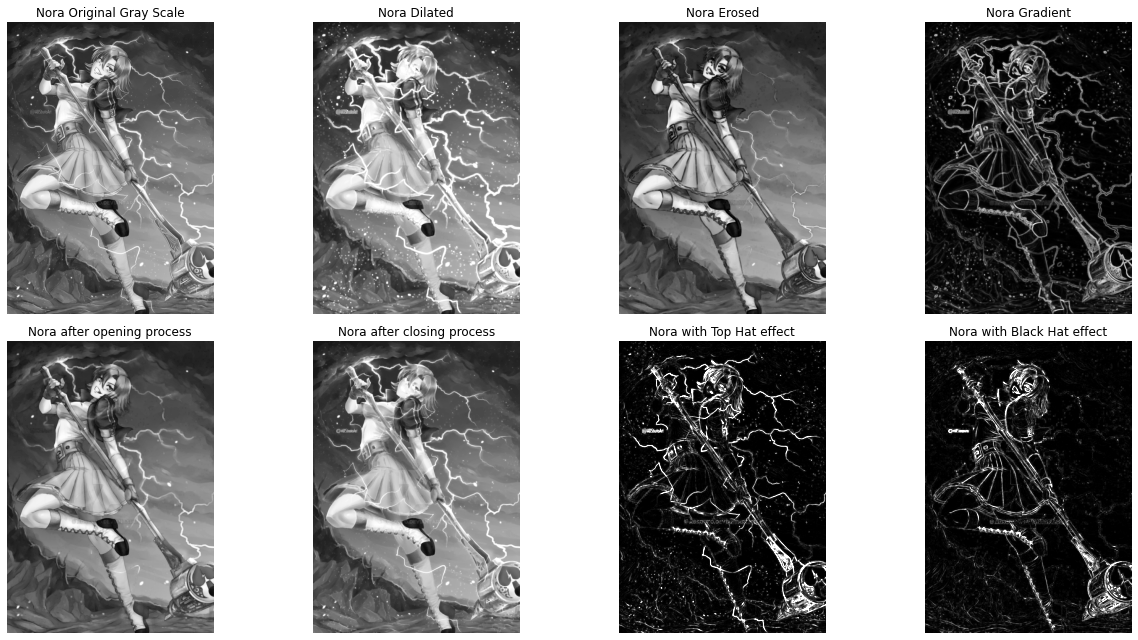

In [53]:
### Morphological Operations ###

#Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Read Image and convert to GrayScale
img = cv.imread('images/Nora.jpg', 0)
variables.append(img)
titles.append('Original Gray Scale')

# Define Kernel for Operations
kernel = np.ones((5,5),np.uint8)

### DILATION AND EROSION ###

dilation = cv.dilate(img,kernel,iterations = 1)
variables.append(dilation)
titles.append('Dilated')

erosion = cv.erode(img,kernel,iterations = 1)
variables.append(erosion)
titles.append('Erosed')

### GRADIENT ###
# difference between dilation and erosion of an image

gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
variables.append(gradient)
titles.append('Gradient')

### OPENING AND CLOSING ###

#Opening - erosion followed by dilation
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
variables.append(opening)
titles.append('after opening process')

#Closing - Dilation followed by Erosion
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
variables.append(closing)
titles.append('after closing process')

### TOP HAT AND BLACK HAT ###

# Top Hat - difference between image and your Opening
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
variables.append(tophat)
titles.append('with Top Hat effect')

# Black Hat - difference between image and your Closing
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
variables.append(blackhat)
titles.append('with Black Hat effect')

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 4, i+1)
    plt.imshow(variables[i], cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Nora ' + titles[i])

    if i == 6 or i == 7:
        plt.imshow(variables[i], cmap="gray", vmin=0, vmax=50)

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()

<h3>Smoothing Images

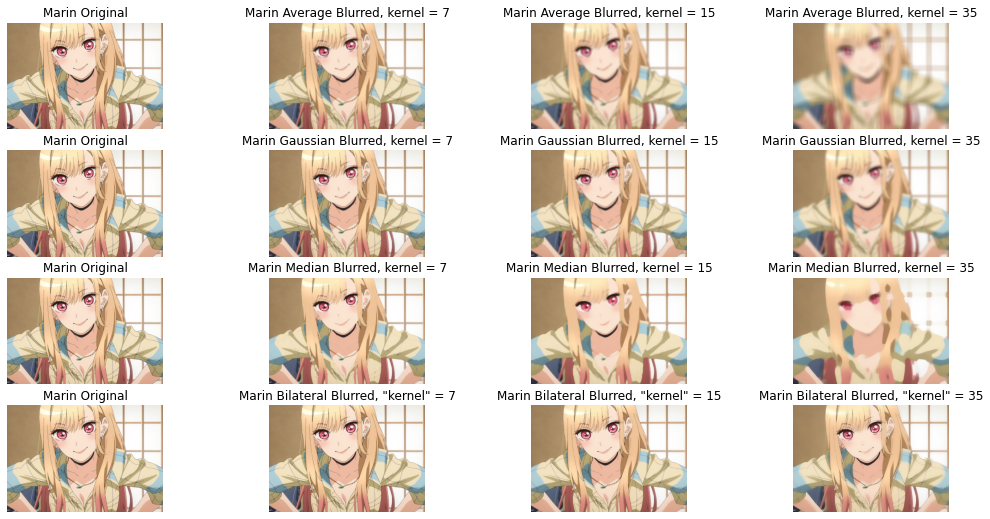

In [10]:
# Importing Modules
import cv2 as cv
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Load Image and convert to RGB
img = cv.imread('images/marin.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Original')


### AVERAGE BLUR ###

avblur7 = cv.blur(img,(7,7),0)
variables.append(avblur7)
titles.append('Average Blurred, kernel = 7')

avblur15 = cv.blur(img,(15,15),0)
variables.append(avblur15)
titles.append('Average Blurred, kernel = 15')

avblur35 = cv.blur(img,(35,35),0)
variables.append(avblur35)
titles.append('Average Blurred, kernel = 35')

### GAUSSIAN BLUR ###

gblur7 = cv.GaussianBlur(img,(7,7),0)
variables.append(gblur7)
titles.append('Gaussian Blurred, kernel = 7')

gblur15 = cv.GaussianBlur(img,(15,15),0)
variables.append(gblur15)
titles.append('Gaussian Blurred, kernel = 15')

gblur35 = cv.GaussianBlur(img,(35,35),0)
variables.append(gblur35)
titles.append('Gaussian Blurred, kernel = 35')

### MEDIAN BLUR ###

medblur7 = cv.medianBlur(img,7)
variables.append(medblur7)
titles.append('Median Blurred, kernel = 7')

medblur15 = cv.medianBlur(img,15)
variables.append(medblur15)
titles.append('Median Blurred, kernel = 15')

medblur35 = cv.medianBlur(img,35)
variables.append(medblur35)
titles.append('Median Blurred, kernel = 35')

### BILATERAL BLUR ###

bilblur7 = cv.bilateralFilter(img,7,19,30)
variables.append(bilblur7)
titles.append('Bilateral Blurred, "kernel" = 7')

bilblur15 = cv.bilateralFilter(img,15,75,55)
variables.append(bilblur15)
titles.append('Bilateral Blurred, "kernel" = 15')

bilblur35 = cv.bilateralFilter(img,35,90,75)
variables.append(bilblur35)
titles.append('Bilateral Blurred, "kernel" = 35')

# Plot Results
j = 0
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(variables[j])
    plt.axis('off')
    plt.title('Marin ' + titles[j])
    if (i)%4 == 0 and i != 0:
        plt.imshow(variables[0])
        plt.title('Marin ' + titles[0])
        j -= 1
    j += 1

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()



<h3> Masks

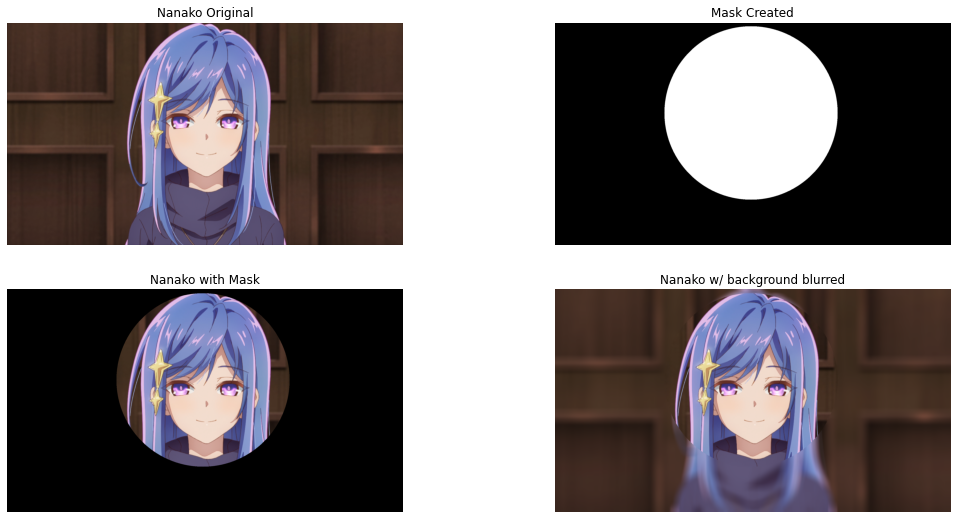

In [5]:
### MASKS ###

# Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Import Image
img = cv.imread('images/maha.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Original')

# Create Mask
mask = np.zeros(img.shape, img.dtype)
variables.append(mask)
titles.append('Mask Created')


# Create Circle in mask
center = (950, 440)
radius = 420
color = (255, 255, 255)
cv.circle(mask, center, radius, color, -1)
masked_img = cv.bitwise_and(img, mask)
variables.append(masked_img)
titles.append('with Mask')


# Create Blur Mask 
blur = cv.blur(img,(45,45),0)
blurmasked_img = np.add(cv.bitwise_or(blur, mask), cv.bitwise_and(img, mask))

variables.append(blurmasked_img)
titles.append('w/ background blurred')

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    plt.imshow(variables[i], cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Nanako ' + titles[i])

    if i == 1:
        plt.title('Mask Created')

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()



<h3>Edge Detection

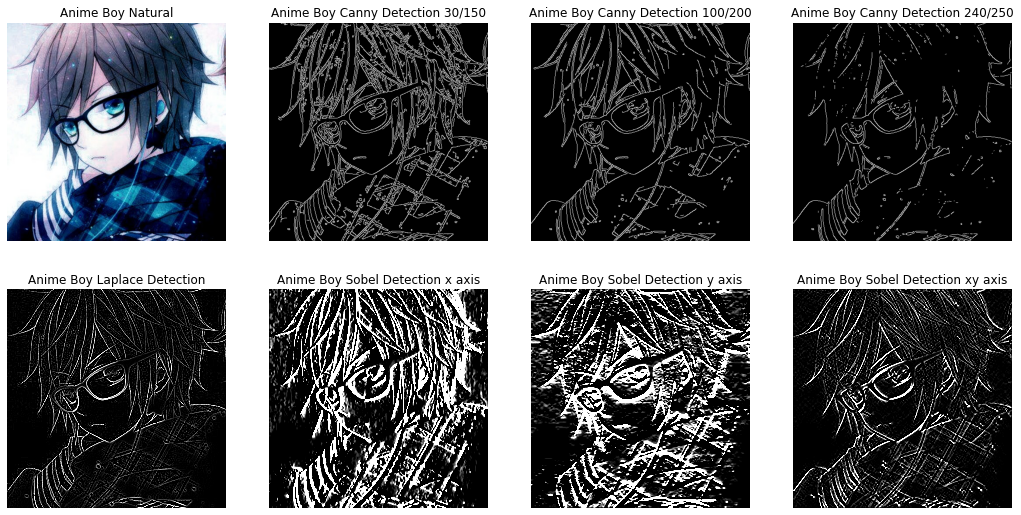

In [13]:
### EDGE DETECTION ###

#Import Modules
import cv2 as cv
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []


# Read Image
img = cv.imread('images/anime-pic.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Natural')


# Smooth Image a little bit to better edges
blurImg = cv.GaussianBlur(gimg, (3,3), 0)

# Canny Edge Detection
cannyImg = cv.Canny(blurImg, 30, 150) 
variables.append(cannyImg)
titles.append('Canny Detection 30/150')

cannyImg2 = cv.Canny(blurImg, 100, 200) 
variables.append(cannyImg2)
titles.append('Canny Detection 100/200')

cannyImg3 = cv.Canny(blurImg, 240, 250) 
variables.append(cannyImg3)
titles.append('Canny Detection 240/250')

# Laplace Edge Detection
laplaceImg = cv.Laplacian(blurImg,cv.CV_64F)
variables.append(laplaceImg)
titles.append('Laplace Detection')

# Sobel Edge Detection
sobelImgx = cv.Sobel(blurImg, cv.CV_64F, dx=1, dy=0, ksize=5) 
variables.append(sobelImgx)
titles.append('Sobel Detection x axis')

sobelImgy = cv.Sobel(blurImg, cv.CV_64F, dx=0, dy=1, ksize=5) 
variables.append(sobelImgy)
titles.append('Sobel Detection y axis')

sobelImgxy = cv.Sobel(blurImg, cv.CV_64F, dx=1, dy=1, ksize=5)
variables.append(sobelImgxy)
titles.append('Sobel Detection xy axis')

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 4, i+1)
    plt.imshow(variables[i], cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Anime Boy ' + titles[i])

    if i == 0:
        plt.imshow(variables[i])
    if i == 4:
        plt.imshow(variables[i], cmap="gray", vmin=0, vmax=30)

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()


<h3> Filter Vignette


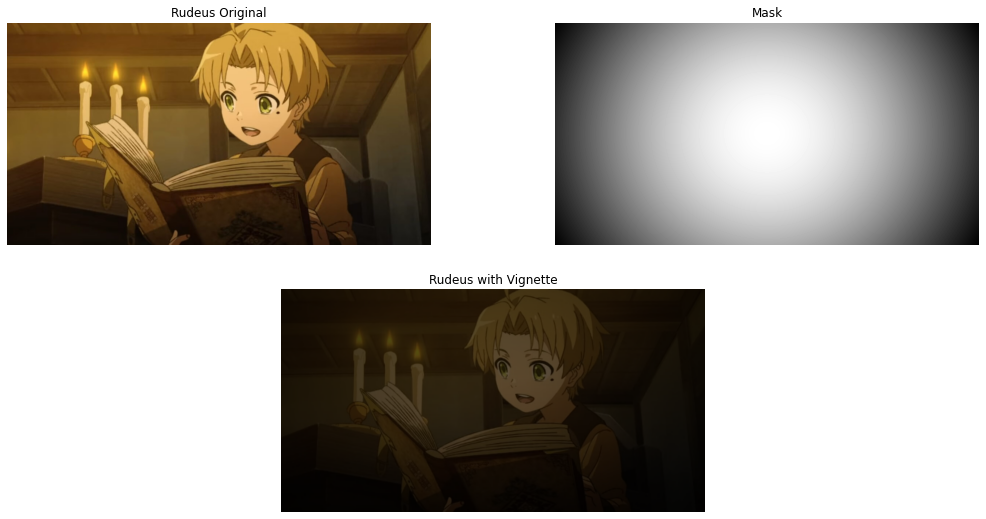

In [19]:
### VIGNETTE FILTER ###

#Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

#Read Image
img = cv.imread('images/rudeus.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Original')

# Get Image Shape
height, width = img.shape[:2]

# Discover Gaussian Kernel x and y for mask
kernel_x = cv.getGaussianKernel(width, 550)
kernel_y = cv.getGaussianKernel(height, 500)
kernel = kernel_x.T * kernel_y

# Vignette Filter mask
mask = kernel * 255 / np.linalg.norm(kernel)
variables.append(mask)
titles.append('Mask')

# Copy Image
output = np.copy(img)

# Apply mask in all channels
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask
variables.append(output)
titles.append('with Vignette')

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    if i == 2:
        plt.subplot(2, 2, (i+1, i+2))
    plt.imshow(variables[i])
    plt.axis('off')
    plt.title('Rudeus ' + titles[i])
    if i == 1:
        plt.imshow(variables[i], cmap="gray")
        plt.title('Mask')

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()


<h3>Face and Eye Detection with Haar's

Text(0.5, 1.0, 'Tokyo Revengers')

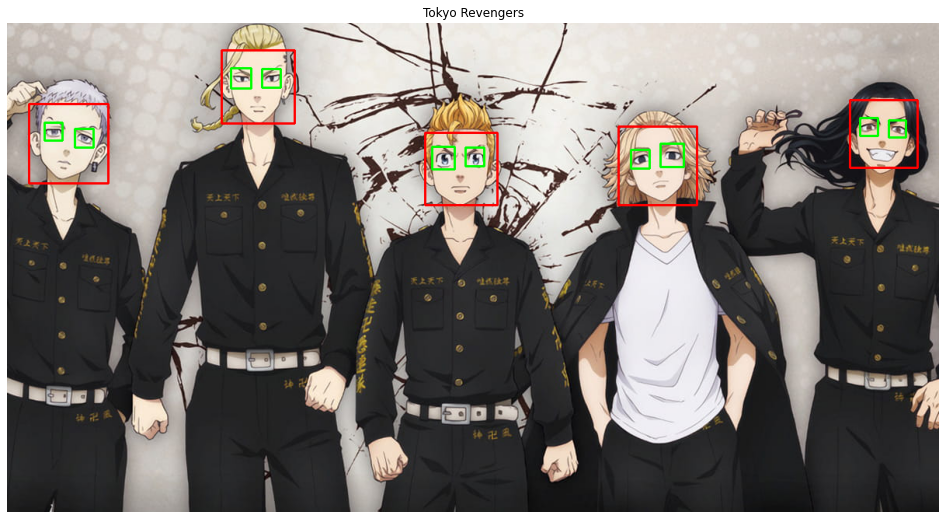

In [10]:
# Import Modules
import cv2 as cv
from matplotlib import pyplot as plt

# Haar Classifiers
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

# Import Image
img = cv.imread('images/tokyo-revengers.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Detect faces
faces = face_cascade.detectMultiScale(gimg, 1.1, 7)

# Draw Rectangles on Faces
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gimg[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # Detect Eyes
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # Draw Rectangles on Eyes
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# Plot Image
plt.imshow(img)
plt.axis('off')
plt.title('Tokyo Revengers')


<h3> Feature Detection and Matching

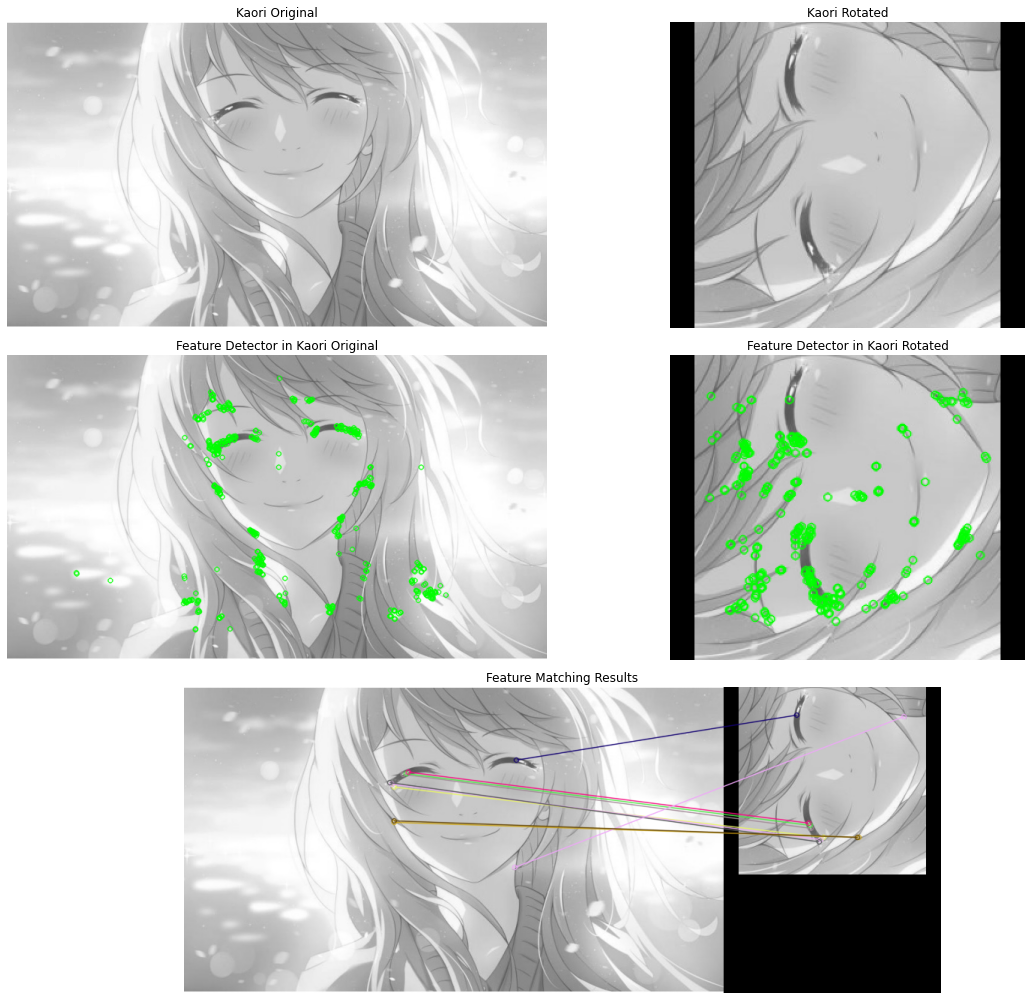

In [44]:
# Import Modules
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs

# Create auxiliar variables to print
variables = [] 
titles = []

# Import Image
img = cv.imread('images/kaori.jpg', 0)
variables.append(img)
titles.append('Kaori Original')


# Crop and Rotate Image
cropImg = img[20:270, 210:500]

height, width = cropImg.shape[:2]
shape = (width, height)
center = (width/2, height/2)

rotateMatrix = cv.getRotationMatrix2D(center, 90, 1)
rotatedImg = cv.warpAffine(cropImg, rotateMatrix, shape)
variables.append(rotatedImg)
titles.append('Kaori Rotated')

### FEATURE DETECTOR ###

# Initiate ORB detector
orbDetector = cv.ORB_create()

# find the keypoints and descriptors with ORB
keyPoints1, descriptors1 = orbDetector.detectAndCompute(img,None)
keyPoints2, descriptors2 = orbDetector.detectAndCompute(rotatedImg,None)

# Draw Key Points in Image
kp_img1 = cv.drawKeypoints(img, keyPoints1, None, color=(0, 255, 0), flags=0)
variables.append(kp_img1)
titles.append('Feature Detector in Kaori Original')

kp_img2 = cv.drawKeypoints(rotatedImg, keyPoints2, None, color=(0, 255, 0), flags=0)
variables.append(kp_img2)
titles.append('Feature Detector in Kaori Rotated')

### FEATURE MATCHING ###
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors and sort them
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

# Draw best 10 matches
matchResult = cv.drawMatches(img, keyPoints1, rotatedImg, keyPoints2, matches[:10], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
variables.append(matchResult)
titles.append('Feature Matching Results')

# Plot Results
for i in range(len(variables)):
    plt.subplot(3, 2, i+1)
    if i == 4:
        plt.subplot(3, 2, (i+1, i+2))
    plt.imshow(variables[i], cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.title(titles[i])

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = (16, 14)
plt.show()
